# IST 718: Big Data Analytics

- Professor: Daniel Acuna <deacuna@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers either from your classmates or from the internet__
- You can put the homework files anywhere you want in your https://jupyterhub.ischool.syr.edu/ workspace but _do not change_ the file names. The TAs and the professor use these names to grade your homework.
- Remove or comment out code that contains `raise NotImplementedError`. This is mainly to make the `assert` statement fail if nothing is submitted.
- The tests shown in some cells (i.e., `assert` and `np.testing.` statements) are used to grade your answers. **However, the professor and TAs will use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before downloading and submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`). 
- Good luck!

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# Part 3: Optimization

The golden ratio is a beautiful number that appears all over nature and mathematics (see more https://en.wikipedia.org/wiki/Golden_ratio).

It is defined as the solution of the following interesting relationship between the sum of two lengths $a$ and $b$ and their ratio $\frac{a}{b}$:

$$\frac{a + b}{a}=\frac{a}{b}\equiv g$$

which we can express as the solution of an equation after moving factors around


$$\frac{a}{a} + \frac{b}{a}=\frac{a}{b}\equiv g$$

and replacing gives the equation we must solve:

$$1 + \frac{1}{g}=g \tag{1}$$

We will further define the left hand side of (1) as 
$$\text{lhs}(g)=1 + \frac{1}{g}$$

and the right-hand side as
$$\text{rhs}(g)=g$$

In this section, we are going to compute the golder ratio using gradient descent.

**Question 3.1 (5 pts)** Simultaneously plot the right-hand side function and left-hand side function over the range of g in 0.5 and 2.5. Add the proper axis labels and legends to the plot. You can use the function `np.linspace` to generate a vector of numbers between 0.5 and 2.5. Try to intuitively think at which point both functions intersect.

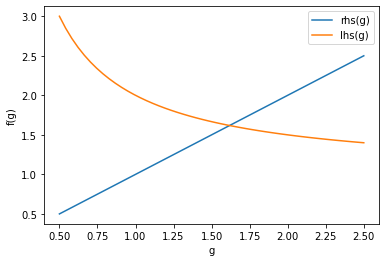

In [2]:
# YOUR CODE HERE
a=np.linspace(0.5,2.5)
lhs=1+1/a
rhs=a
plt.plot(a,rhs,label="rhs(g)")
plt.plot(a,lhs,label="lhs(g)")
plt.legend()
plt.xlabel("g")
plt.ylabel("f(g)")
plt.show()

**Question 3.2 (10 pts)** Define a quadratic loss function `L` that penalizes the error (e.g., the difference) between the lhs and rhs for a given value of $g$.

In [3]:
def L(g):    
    a=g
    b=1+1/a
    return (a-b)*(a-b)

You can try your function below. We know that the golden ratio is closer to 1.5 than 1.0, therefore, your loss function should be bigger at `g=1.0` than `g=1.5`

In [4]:
print(f"L(1.0)={L(1.0):.2f}")
print(f"L(1.5)={L(1.5):.2f}")

L(1.0)=1.00
L(1.5)=0.03


In [5]:
# 10 pts
np.testing.assert_equal(L(1.0), 1.)
assert L(1.0) > L(1.5)
np.testing.assert_almost_equal(L(1.618033988749895), 0.)

**Question 3.3 (10 pts)** Define a function `dL` that is the derivative of the loss function with respect to g

In [6]:
# YOUR CODE HERE
# raise NotImplementedError()

def dL(g):
    return 2*(1/(g*g)+1)*(g-1/g-1)

You can try your function below. We know that from 1 you are getting closer to the golden ratio and after 2 your are getting away from it. Therefore, the derivative at 1 should be negative and 2 should be positive.

In [7]:
print(f"dL(1.0)={dL(1.0):.2f}")
print(f"dL(2.0)={dL(2.0):.2f}")

dL(1.0)=-4.00
dL(2.0)=1.25


In [8]:
# 10 points
np.testing.assert_equal(dL(1.0), -4)
np.testing.assert_equal(dL(2.0), 1.25)
np.testing.assert_almost_equal(dL(1.618033988749895), 0.)

**Question 3.4 (5 pts)** The gradient descent code below is missing some pieces. Fix it so that the final value of g is close to the golden ratio (approximately 1.61)

In [9]:
# initial guess for g
g = 0.1
# YOUR CODE HERE
r = 0.001
# raise NotImplementedError()
for i in range(2000):
    if i % 100 == 0:
        print(f"iteration {i}\t\tg: {g:3f}\t\tL:{L(g):3f}\t\tg:{dL(g):3f}")
    # YOUR CODE HERE
    g = g-r*dL(g)
    # raise NotImplementedError()
print(f"\nFinal guess for the golden ratio: {g:5f}")

iteration 0		g: 0.100000		L:118.810000		g:-2201.800000
iteration 100		g: 2.121571		L:0.422790		g:1.589365
iteration 200		g: 1.982615		L:0.228704		g:1.199787
iteration 300		g: 1.878639		L:0.119951		g:0.888943
iteration 400		g: 1.802248		L:0.061200		g:0.647099
iteration 500		g: 1.747055		L:0.030507		g:0.463778
iteration 600		g: 1.707744		L:0.014927		g:0.328140
iteration 700		g: 1.680068		L:0.007200		g:0.229830
iteration 800		g: 1.660755		L:0.003436		g:0.159746
iteration 900		g: 1.647369		L:0.001627		g:0.110410
iteration 1000		g: 1.638135		L:0.000766		g:0.076004
iteration 1100		g: 1.631788		L:0.000360		g:0.052170
iteration 1200		g: 1.627435		L:0.000168		g:0.035739
iteration 1300		g: 1.624456		L:0.000079		g:0.024449
iteration 1400		g: 1.622418		L:0.000037		g:0.016709
iteration 1500		g: 1.621026		L:0.000017		g:0.011412
iteration 1600		g: 1.620076		L:0.000008		g:0.007791
iteration 1700		g: 1.619427		L:0.000004		g:0.005317
iteration 1800		g: 1.618984		L:0.000002		g:0.003628
iteration 1900		g:

In [10]:
# 5 pts
np.testing.assert_approx_equal(g, 1.61, significant=3)